In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tkinter as tk
from tkinter import filedialog as fd

import contextily as ctx

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/CATASTRO/CATASTRO_2023-03-04.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

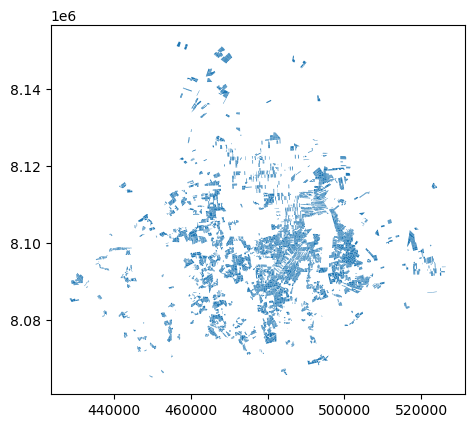

In [5]:
data.plot()
plt.show()

In [6]:
data.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L1.3,UCG_90-20,30/5/2018,FY,IAG,4,canha,79,0.771315,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L1.5,UCG_90-20,20/5/2011,FY,None,11,canha,79,3.831973,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560.0,LA TUJA IAG SA,15284.0,ROJAS CORDOVA ROGELIO FELIPE,L2.2,CITTCA_85-22,20/5/2018,FY,IAG,4,canha,79,2.245713,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."


In [7]:
cod_ca = 30

In [8]:
prop = data[data['unidad_01']==cod_ca]
prop.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
6901,0000300000ER-L17,30.0,PAILON Y ROCIO,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L17,RB-2,12/3/2020,FY,IAG,2,canha,50,13.975706,"POLYGON Z ((501942.803 8095275.466 0.000, 5021..."
6902,0000300000ER-L20,30.0,PAILON Y ROCIO,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,ER-L20,RENOVACION,1/1/1900,F,None,122,renovacion,50,7.095109,"POLYGON Z ((501107.461 8094860.692 0.000, 5011..."
6903,0000300000EP-L7,30.0,PAILON Y ROCIO,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,EP-L7,RBB_77-26,11/5/2022,F,PROPIO,0,canha,50,15.371285,"POLYGON Z ((501510.045 8095556.280 0.000, 5014..."


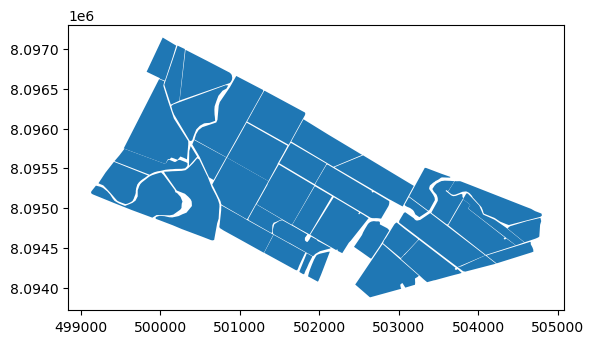

In [9]:
prop.plot()
plt.show()

In [10]:
lotes_canha = prop[prop['variedad']!='RENOVACION']
lotes_renovacion = prop[prop['variedad']=='RENOVACION']

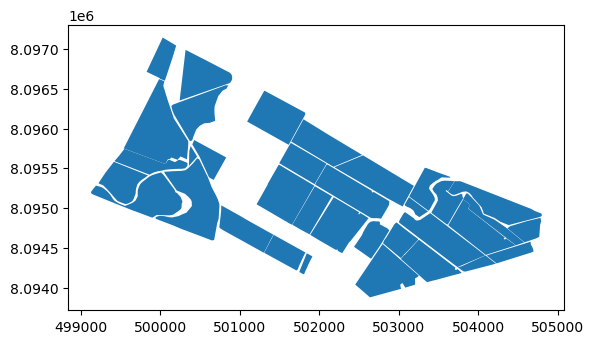

In [11]:
lotes_canha.plot()
plt.show()

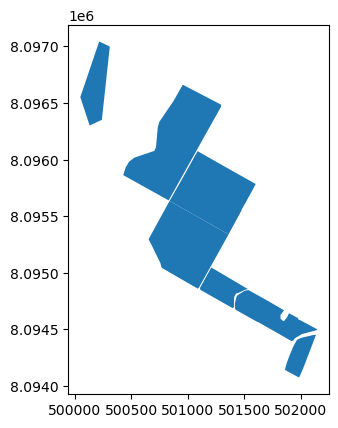

In [12]:
lotes_renovacion.plot()
plt.show()

In [13]:
total_canha = prop.loc [prop['variedad'] != 'RENOVACION', 'area'].sum()
total_renovacion = prop.loc [prop['variedad'] == 'RENOVACION', 'area'].sum()

In [14]:
total_canha

631.5051165253999

In [15]:
total_renovacion

135.75397714614002

In [16]:
total_canha + total_renovacion

767.2590936715399

In [17]:
pd.pivot_table(lotes_canha, values='area', index=['unidad_03', 'unidad_04'], aggfunc=np.sum).reset_index()

,unidad_03,unidad_04,area
0,41594.0,AGROPECUARIA CAMPO DULCE S.R.L.,631.505117


In [18]:
fig = None

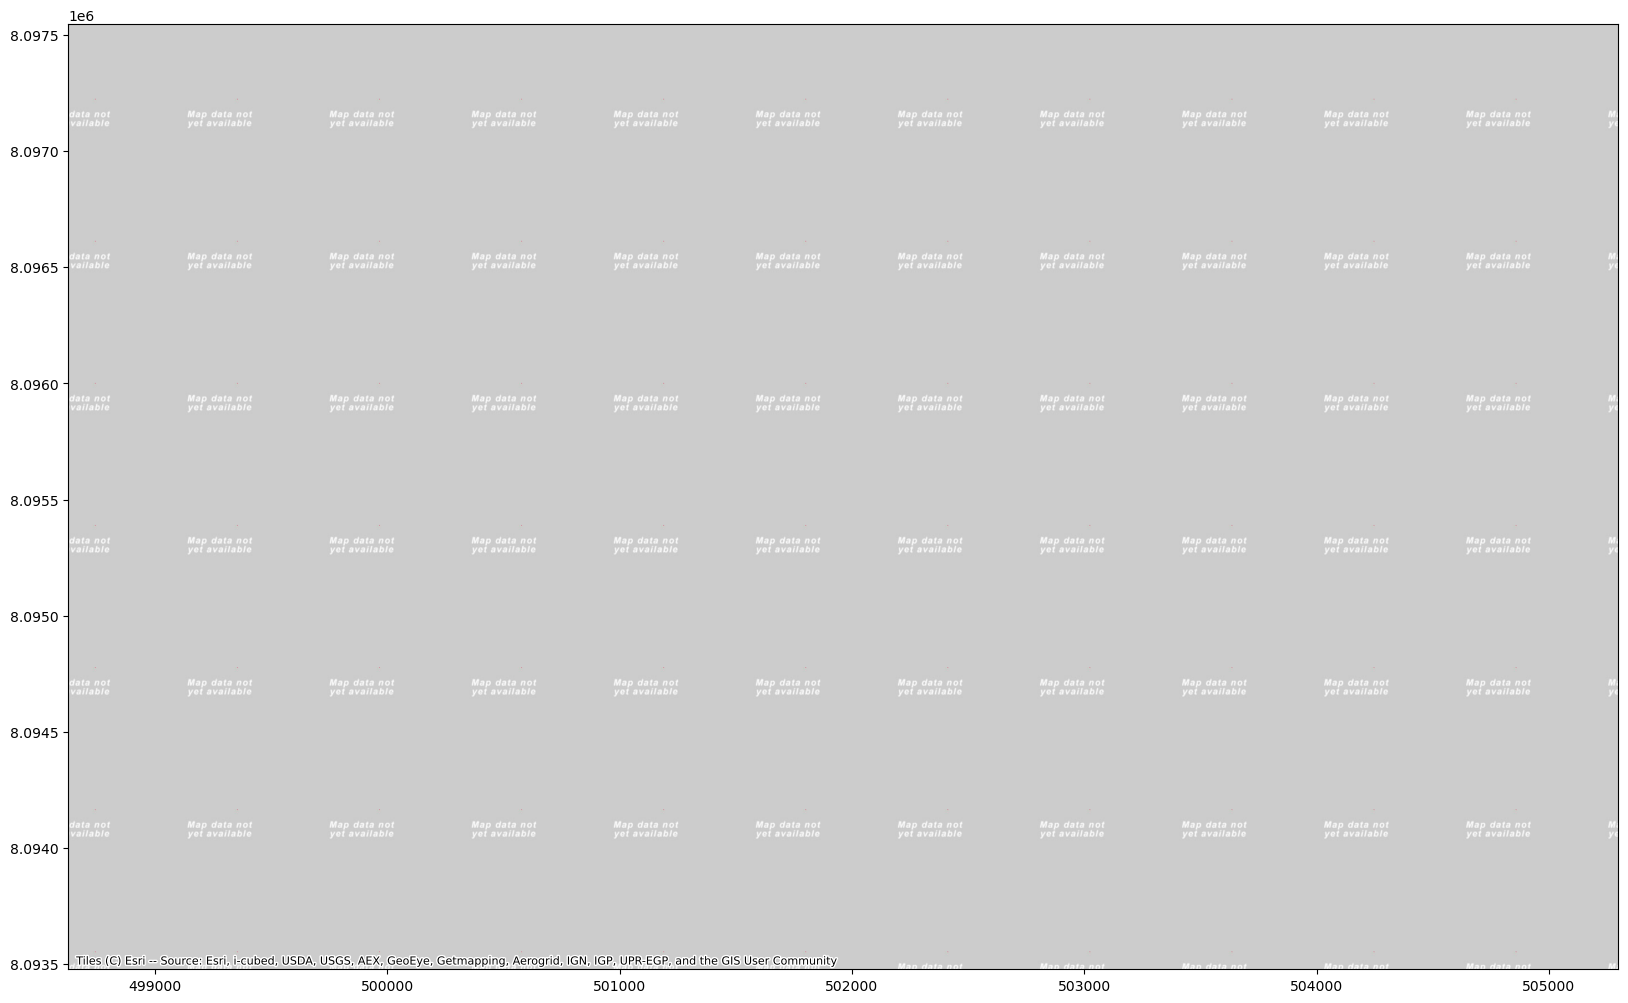

In [19]:
#prop.crs = "EPSG:4326"
lotes_canha = lotes_canha.to_crs(epsg=3857)
lotes_renovacion = lotes_renovacion.to_crs(epsg=3857)
#lotes_renovacion.crs = "EPSG:4326"
#lotes_renovacion = lotes_canha.to_crs(epsg=3857)
fig = plt.figure(1,figsize=(20,20))
ax = None
ax = fig.add_subplot()
#prop.apply(lambda x: ax.annotate(text=x.unidad_05 + ' \n' + str(x.area) + ' ha', xy=x.geometry.centroid.coords[0], ha='center', va='center', color='black', fontsize=12, weight=1000, bbox=dict(facecolor=(1,1,1,0.3), edgecolor='none', pad=0)), axis=1);
minx, miny, maxx, maxy = prop.total_bounds
ax.set_xlim(minx - 500, maxx + 500)
ax.set_ylim(miny - 400, maxy + 400)
lotes_canha.plot(ax=ax, edgecolor='r', facecolor=(0,0,0,0), linewidth=2, figsize=(20,20))
lotes_renovacion.plot(ax=ax, edgecolor='b', facecolor=(0,0,0,0), linewidth=2, figsize=(20,20))
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

In [181]:
lotes_canha.plot(ax=ax, edgecolor='b', facecolor=(0,0,0,0), linewidth=3, figsize=(20,20))

<Figure size 640x480 with 0 Axes>

In [101]:
prop['coords'] = prop['geometry'].apply(lambda x: x.representative_point().coords[:])
prop['coords'] = [coords[0] for coords in prop['coords']]

C:\Users\UTEA\Anaconda3\envs\estimativas\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [103]:
prop.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry,coords
1065,0000170000C3,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C3,CITTCA_85-22,7/5/2020,FA,IAG,2,canha,50,25.237523,"POLYGON Z ((472866.278 8094322.612 0.000, 4728...","(472669.75456822314, 8094498.495649999)"
1066,0000170000C4,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,C4,CITTCA_85-22,7/5/2020,FA,IAG,2,canha,50,5.625935,"POLYGON Z ((472333.318 8094343.402 0.000, 4723...","(472334.11401326535, 8094421.0156)"
1067,0000170000B6.2,17.0,LA ESTACADA--OLGUITA,8003.0,AGUILERA RIVERO SERGIO STEFAN,B6.2,CITTCA_85-22,13/4/2020,FY,IAG,2,canha,50,7.590585,"POLYGON Z ((473166.109 8096445.273 0.000, 4732...","(473116.83823324414, 8096202.192)"
